In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
import os
import cv2
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D ,Flatten , Dense, Dropout
from keras.utils import to_categorical
from keras.layers import Convolution2D , MaxPooling2D , Dense , Dropout , Flatten

# loading the train data

In [2]:
image_size = 200 # this 200 is just a number
path1=r"Shoe Classification\train"
category = ['Boots' ,'Sandals','Slippers'] ## so index for this is 0,1,2

input_image = []
for i in category:
    folders = os.path.join(path1 ,i)
    label = category.index(i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        image_array = cv2.imread(image_path)
        image_array =cv2.resize(image_array , (image_size , image_size) )
        input_image.append([image_array , label])

In [3]:
input_image

[[array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         ...,
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255

In [4]:
len(input_image)          # Total no. of images in our train set

778

In [5]:
np.random.shuffle(input_image) ## to shuffle the images
X = []
Y = []
for X_values , labels in input_image:
    X.append(X_values)
    Y.append(labels)
X = np.array(X)
Y = np.array(Y)

In [6]:
print(X.shape)
print(Y.shape)

(778, 200, 200, 3)
(778,)


1


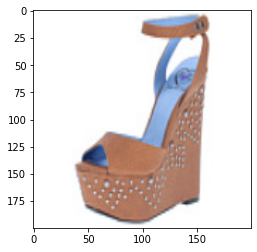

In [7]:
x=60
plt.imshow(X[x])
print(Y[x])

# Normalizing

In [8]:
X=X/255          # Normalize pixel values to be between 0 and 1

In [9]:
X

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 

# Splitting the data into train and test

In [10]:
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test , Y_train = train_test_split(X,Y , train_size=0.2 )

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(623, 200, 200, 3)
(155, 200, 200, 3)
(623,)
(155,)


In [12]:
print(X[0].shape)

(200, 200, 3)


# Creating CNN model

In [13]:
model = Sequential()

model.add(Convolution2D(filters = 32 ,kernel_size=(3,3) , activation="relu" , input_shape = X[0].shape , padding="same" ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(filters = 64 ,kernel_size=(3,3) , activation="relu" , padding="same" ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(filters = 128 ,kernel_size=(3,3) , activation="relu" , padding="same" ))
model.add(MaxPooling2D(pool_size=(2,2)))
                        

model.add(Flatten())

model.add(Dense( 128 , activation="relu" , ))


model.add(Dropout(0.4))

model.add(Dense( 3 , activation="softmax"))


model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=['accuracy'])

model1 = model.fit(X_train, Y_train , validation_split=0.2, epochs=1 )

16/16 [==============================] - 71s 4s/step - loss: 1.4816 - accuracy: 0.4799 - val_loss: 0.8822 - val_accuracy: 0.5760


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

# Confusion matrix for train data

In [17]:
predictions_train_data = np.argmax(model.predict(X_train), axis=-1)
from sklearn.metrics import confusion_matrix
tab2=confusion_matrix(predictions_train_data,Y_train)
print(tab2)

20/20 [==============================] - 18s 881ms/step
[[ 87   0   0]
 [172 243 121]
 [  0   0   0]]


# Accuracy for train data

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,predictions_train_data))

0.5296950240770465


# Confusion matrix for X_test data

In [19]:
predictions_X_test = np.argmax(model.predict(X_test), axis=-1)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predictions_X_test,Y_test))

5/5 [==============================] - 5s 961ms/step
[[23  0  0]
 [44 63 25]
 [ 0  0  0]]


# Accuracy matrix for X_test data

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions_X_test))

0.5548387096774193


# Loading the test data

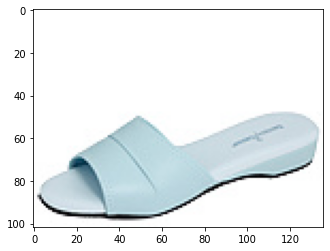

In [22]:
image_size = 200 
path1=r"Shoe Classification\test"
input_image = []
for image in os.listdir(path1):
        image_path = os.path.join(path1 , image)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        image_array =cv2.resize(image_array , (image_size , image_size) )
        input_image.append(image_array)

In [23]:
len(input_image)   ## no. of images in test set

89

In [24]:
Test_X=[]
for X_val in input_image:
    Test_X.append(X_val)
Test_X=np.array(Test_X)

In [25]:
Test_X

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [26]:
Test_X = Test_X / 255

In [27]:
Test_X

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

# Predicting the test data

In [31]:
predictions_test_data = np.argmax(model.predict(Test_X), axis=-1)

3/3 [==============================] - 3s 862ms/step


In [29]:
predictions_test_data = model.predict(Test_X)

3/3 [==============================] - 3s 844ms/step


In [32]:
predictions_test_data

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

# Saving the predictions

In [ ]:
file_name = "submission.csv"
predicted = pd.Series(predictions_test_data, name='Label')
sub = pd.concat([pd.Series(range(1, 90), name="ImageId"), predicted], axis=1)
sub.to_csv(file_name, index=False)

In [ ]:
predicted